<a href="https://colab.research.google.com/github/Arimoro2020/food-sales-predictions./blob/main/Exploratory_data_analysis_%26_visualization_sales_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Various data visualizations that help  better understand the data (exploratory data analysis) and help understand trends in the data (explanatory data analysis)**

In [30]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [32]:
from plotly import __version__

In [33]:
import cufflinks as cf

In [34]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [35]:
init_notebook_mode(connected=True)

In [36]:
cf.go_offline()

In [37]:
# create function for dislaying plots in Colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext ',
            },
          });
        </script>
        '''))

In [38]:
# Load the cleansed sales prediction data
filename = '/content/drive/MyDrive/PTDataScience/Pandas_for_Data_Manipulation/cleansed data_sales pridiction.xlsx'
sales_df = pd.read_excel(filename)
sales_df.head()

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 11 columns]

In [39]:
# convert the outlet establishment year from int to string
sales_df['Outlet_Establishment_Year'] = sales_df['Outlet_Establishment_Year'].apply(str)

In [40]:
# Switch from matplotlib defaults to seaborn defaults
sns.set_theme()

**Distribution Plots**

In [41]:
configure_plotly_browser_state() # Call function to display plot in Colab
sales_df['Item_MRP'].iplot(kind='histogram', xTitle='Item Maximum Retail Price', yTitle='Count', title='A Bimodal Univariate Distribution Plot of Item MRP; suggesting a lurking variable', bins=20)


In [42]:
configure_plotly_browser_state() # Call function to display plot in Colab
sales_df.iplot(kind='scatter', mode='markers', x='Item_Visibility', y='Item_Outlet_Sales', xTitle='Item Visibility', yTitle='Item Outlet Sales', title='Bivariate Distribution Plot of showing most sales in items with visibility < 0.2')

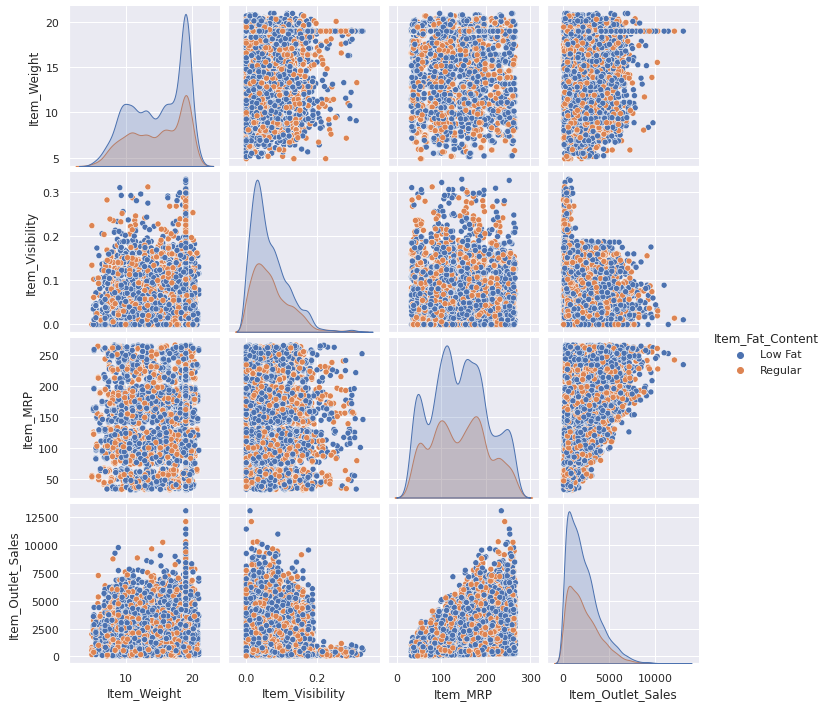

In [43]:
# Check for correlation/trends in numeric features
sns.pairplot(kind='scatter', data=sales_df, hue='Item_Fat_Content')

**Categorical Plots**

In [44]:
configure_plotly_browser_state() # Call function to display plot in Colab
sales_df.iplot(kind='bar', x='Outlet_Location_Type', y='Item_Outlet_Sales', xTitle='Outlet Location Type', yTitle='Item Outlet Sales', title='Bar Plot of Outlet Location Type vs.Item Outlet Sales')

In [45]:
configure_plotly_browser_state() # Call function to display plot in Colab
sbox = sales_df.loc[ : , ['Outlet_Establishment_Year', 'Item_Outlet_Sales']]
sbox[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].pivot(columns='Outlet_Establishment_Year', values='Item_Outlet_Sales').iplot(kind='box', xTitle='Outlet Establishment Year', yTitle='Item Outlet Sales', title='Boxplot with outliers, showing significant difference in 1998 outlet establishment', boxpoints='outliers')


**Matrix Plots**

In [46]:
# Create Dataframe Pivot Table with Item MRP values
sales_df_filter = sales_df.loc[ : , ['Item_Type', 'Outlet_Location_Type', 'Item_MRP']]
mrp = sales_df_filter.pivot_table(index='Item_Type', columns='Outlet_Location_Type', values='Item_MRP')
mrp

Outlet_Location_Type       Tier 1      Tier 2      Tier 3
Item_Type                                                
Baking Goods           124.389121  126.258343  127.945391
Breads                 146.045788  137.639740  140.323138
Breakfast              125.774400  151.478131  146.640916
Canned                 138.696381  143.355646  137.330057
Dairy                  145.929290  148.667932  150.365087
Frozen Foods           136.504640  139.873045  138.862819
Fruits and Vegetables  148.741817  143.529772  142.600221
Hard Drinks            126.267555  136.023644  145.445905
Health and Hygiene     131.879567  130.002942  130.768381
Household              150.534495  150.739074  147.593780
Meat                   138.377475  143.833074  138.137289
Others                 139.947136  136.423408  123.292374
Seafood                150.890758  134.199373  141.676496
Snack Foods            146.145581  144.465599  147.721702
Soft Drinks            130.170610  131.183404  132.725580
Starchy Foods          150.535350  143.834894  149.788227

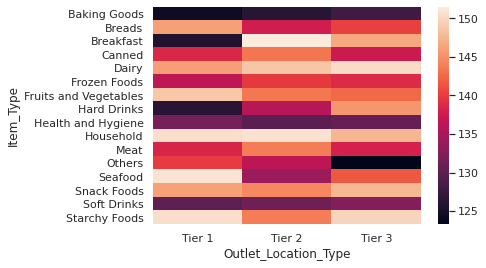

In [47]:
# Create heat map with pivot table dataframe with Item MRP values
sns.heatmap(mrp)

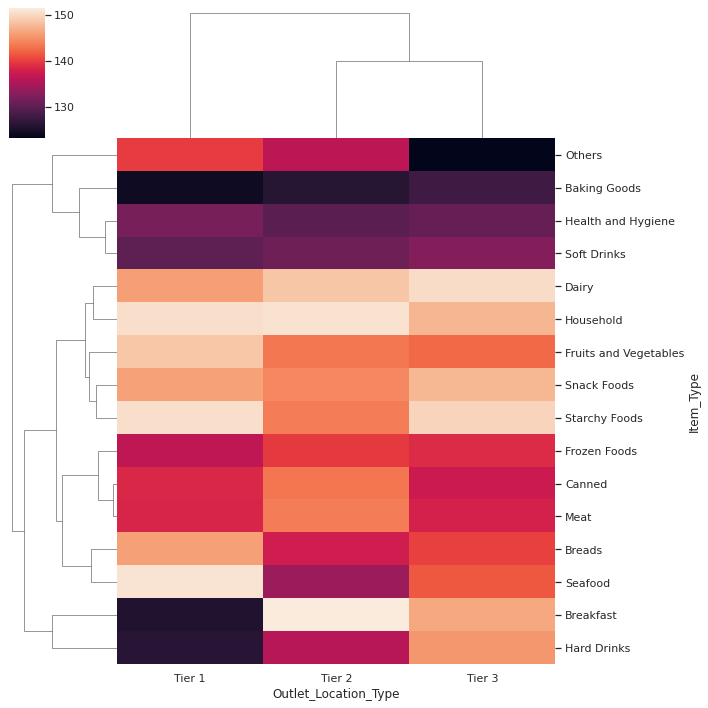

In [48]:
# Create cluster map with pivot table dataframe with Item MRP values
# Clustermap help to explain bimodal distribution of Item MRP, and possible lurking variable.
sns.clustermap(mrp)

In [49]:
# Create Dataframe Pivot Table with Item oulet sales values
sales_df_filter = sales_df.loc[ : , ['Item_Type', 'Outlet_Location_Type', 'Item_Outlet_Sales']]
sp = sales_df_filter.pivot_table(index='Item_Type', columns='Outlet_Location_Type', values='Item_Outlet_Sales')
sp

Outlet_Location_Type        Tier 1       Tier 2       Tier 3
Item_Type                                                   
Baking Goods           1766.342208  2052.633001  2006.533613
Breads                 2049.382087  2275.347721  2247.993804
Breakfast              1532.631248  2417.394963  2319.232924
Canned                 1852.895069  2457.680736  2282.335768
Dairy                  1809.322867  2456.416209  2380.265379
Frozen Foods           1897.476736  2257.544049  2206.455092
Fruits and Vegetables  1970.086395  2382.370900  2430.594179
Hard Drinks            1884.684652  2245.114589  2224.207940
Health and Hygiene     1862.165406  2093.888859  2039.980376
Household              1969.979693  2414.984811  2330.118917
Meat                   1725.347624  2284.982989  2371.327574
Others                 1675.628371  2223.106200  1902.965548
Seafood                2077.821632  2696.338682  2176.963365
Snack Foods            1948.236451  2381.754219  2423.638001
Soft Drinks            1606.364563  2160.130850  2148.770423
Starchy Foods          2290.185550  2645.022404  2182.514969

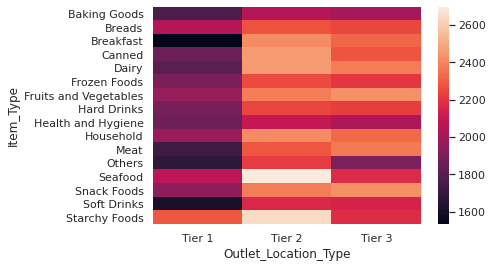

In [50]:
# Create heat map with pivot table dataframe of Item oulet sales values
sns.heatmap(sp)

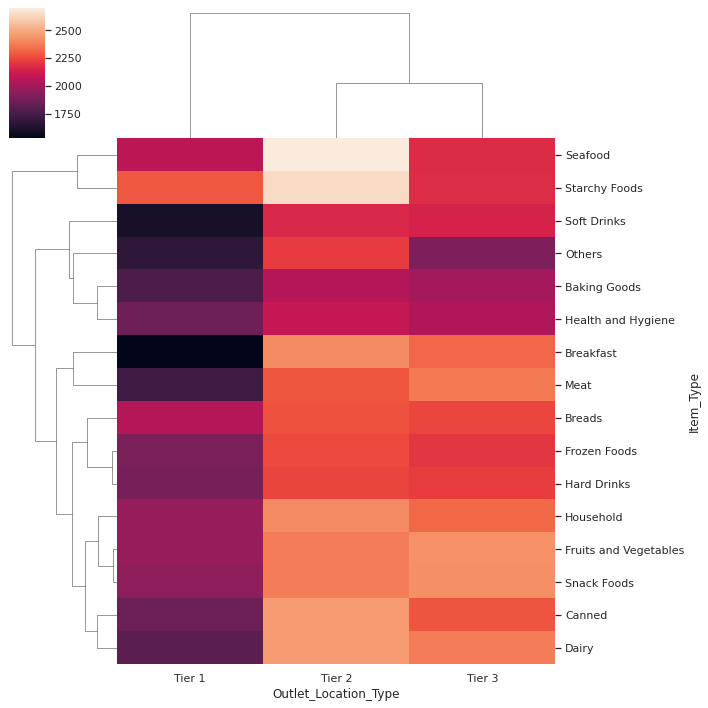

In [51]:
# Create cluster map with pivot table dataframe of Item outlet sales values
# Clustermap help identify products(Item type) that have most sales in each outlet location type
sns.clustermap(sp)